In [1]:
#%matplotlib inline

import mne
import matplotlib.pyplot as plt
import numpy as np
subject = '01'

# Load and prepare the data
fname_pre = '/Users/alexe/Kaggle/tdcs/Magnus_pre_post_tdcs/out/2025-01-24T154322_pre_phase_1_preproc-epo.fif'
fname_post = '/Users/alexe/Kaggle/tdcs/Magnus_pre_post_tdcs/out/2025-01-24T162236_post_phase_1_preproc-epo.fif'

epochs_pre = mne.read_epochs(fname_pre, preload=True)
epochs_pre = epochs_pre.crop(-0.1, 0.3)

epochs_post = mne.read_epochs(fname_post, preload=True)
epochs_post = epochs_post.crop(-0.1, 0.3)

evoked_pre = epochs_pre.average()
evoked_post = epochs_post.average()

Reading /Users/alexe/Kaggle/tdcs/Magnus_pre_post_tdcs/out/2025-01-24T154322_pre_phase_1_preproc-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32)  idle
    Found the data of interest:
        t =    -800.00 ...     798.62 ms
        0 CTF compensation matrices available
Not setting metadata
76 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading /Users/alexe/Kaggle/tdcs/Magnus_pre_post_tdcs/out/2025-01-24T162236_post_phase_1_preproc-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32)  idle
    Found the data of interest:
        t =    -800.00 ...     798.62 ms
        0 CTF compensation matrices available
Not setting metadata
86 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [2]:
#mne.channels.get_builtin_montages(descriptions=True)

In [3]:
#evoked_pre.plot_sensors(show_names=True);
#xlim=(-0.1, 0.3)


In [4]:
## Set DPI for saving plots
plt.rcParams['figure.dpi'] = 600  # Higher number = higher resolution

# Set figure size (in inches)
plt.rcParams['figure.figsize'] = [12, 8]

### Plotting Pre

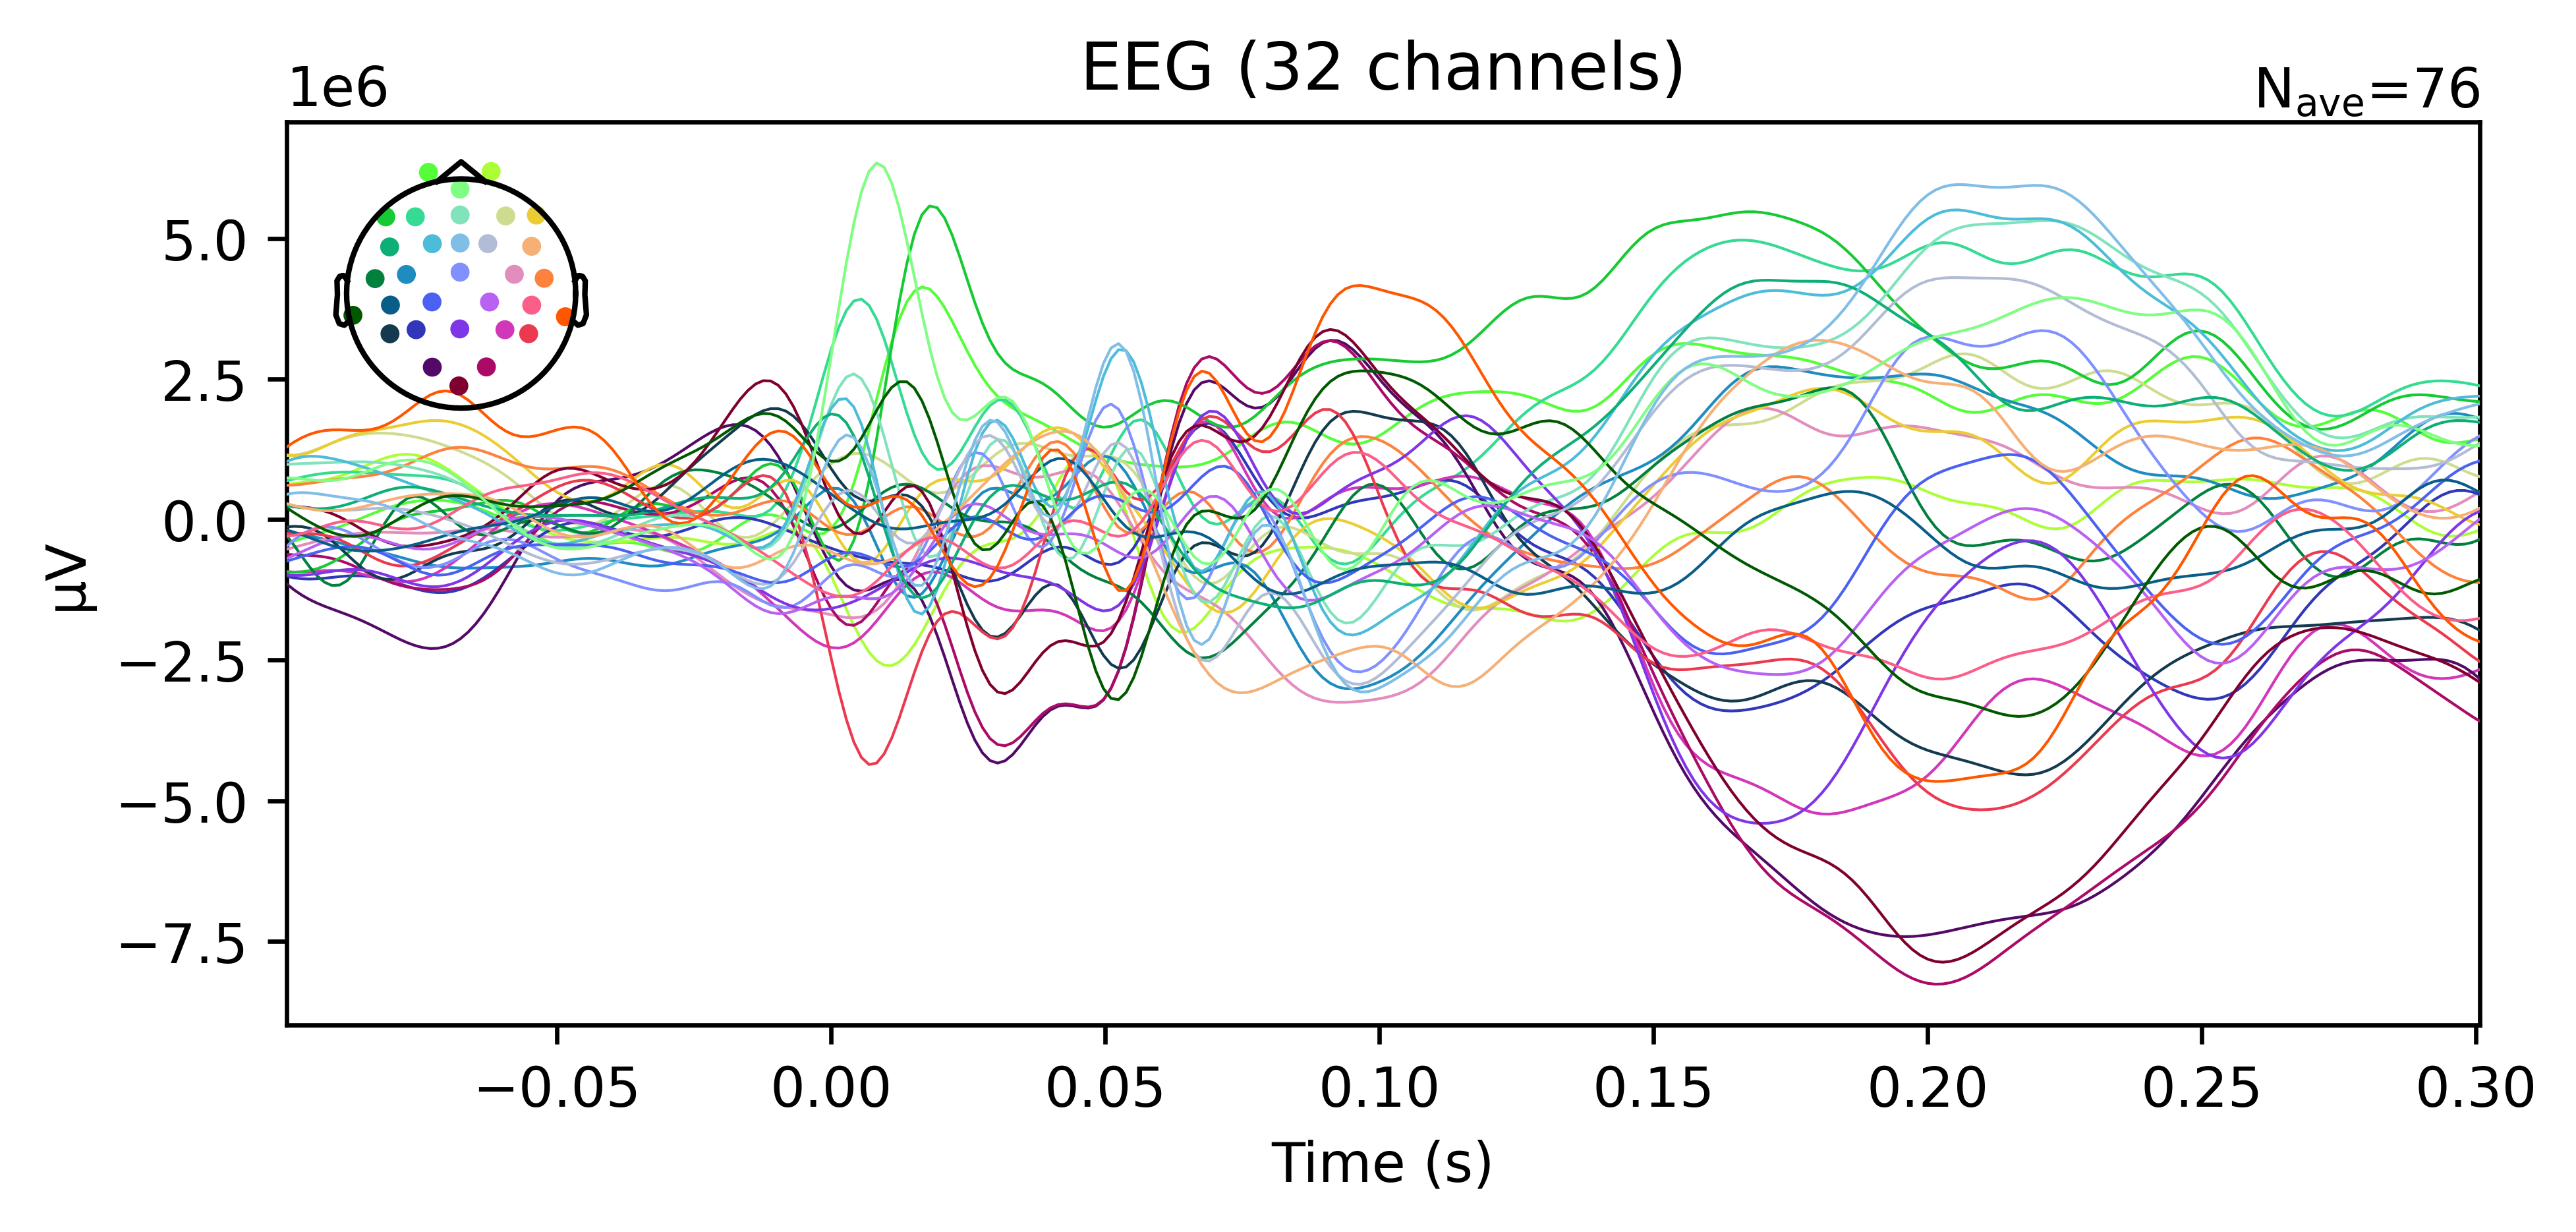

In [5]:
fig = evoked_pre.plot(unit=True, show=True, ylim=None, proj=False, hline=None, scalings=None, titles=None, axes=None, gfp=False, window_title=f"subject_{subject}_pre_evoked",
selectable=False, time_unit='s',  verbose=True);

In [6]:
fig.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_pre_tdcs_evoked.png", dpi=600)

## Plotting pre

In [7]:
# GFP plot pre
## get data from evoked object channels x times
D_pre = evoked_pre.get_data()

## get times for x-axis
times_pre = evoked_pre.times
## calculate gfp as standard deviations over all channels for each point in time

gfp_pre = D_pre.std(axis=0, ddof=0)

## invert for negative peaks
inverted_gfp_pre = -gfp_pre

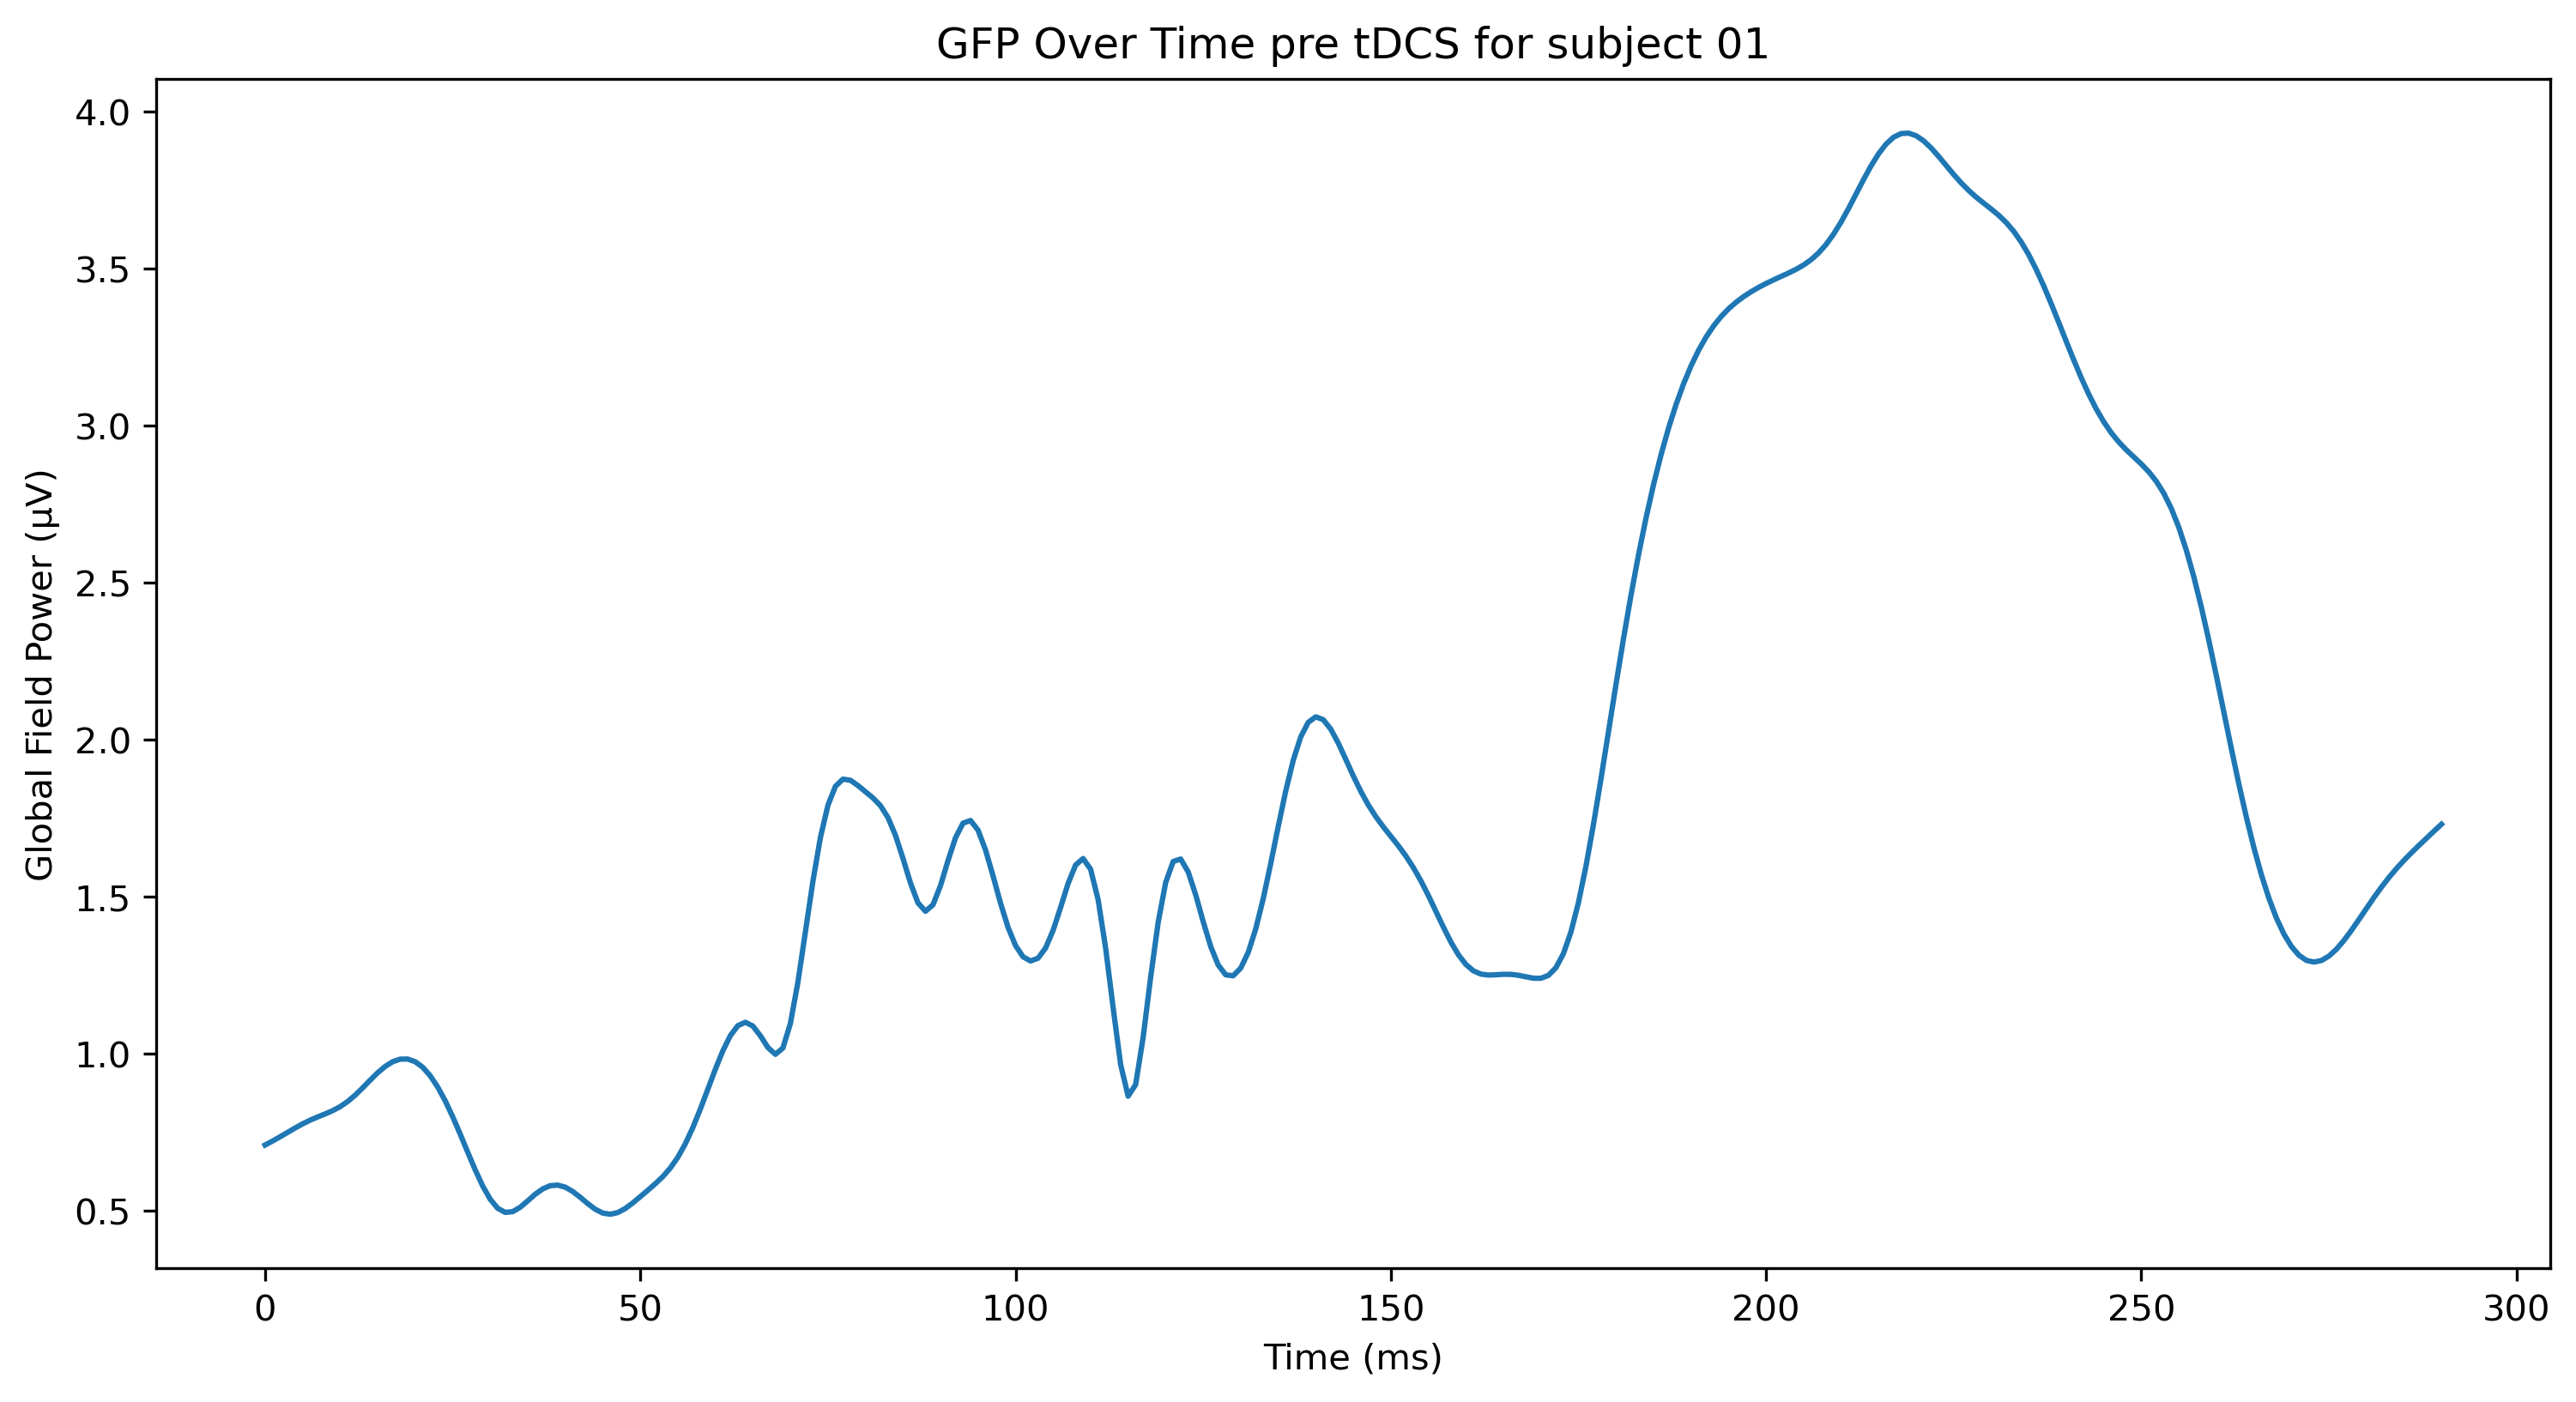

In [8]:
# Create the plot
plt.figure(figsize=(12, 6), dpi=300)  # Set figure size and high DPI for quality
plt.plot(gfp_pre)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Global Field Power (µV)')
plt.title(f"GFP Over Time pre tDCS for subject {subject}")

# Save the figure in high resolution
plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_pre_tdcs_gfp.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close(fig)

## Plotting pre

In [9]:
from scipy.signal import find_peaks

time_mask_pre = (times_pre >= 0.08) & (times_pre <= 0.140)  # Adjust time range as needed
time_window_peaks_pre, _ = find_peaks(-gfp_pre[time_mask_pre],
                                 prominence=0.01,
                                distance=20)

# Convert peak indices to actual times
peak_times_pre = times_pre[time_mask_pre][time_window_peaks_pre]
peak_values_pre = gfp_pre[time_mask_pre][time_window_peaks_pre]

max_peak_index_pre = np.argmin(peak_values_pre)

# Use this index to get the corresponding time
min_peak_time_pre = peak_times_pre[max_peak_index_pre]
min_peak_value_pre = peak_values_pre[max_peak_index_pre]

In [10]:
print(f"min_peak_time", min_peak_time_pre)
print(f"min_peak_value", min_peak_value_pre)

min_peak_time 0.13517241379310344
min_peak_value 1.2396147619058309


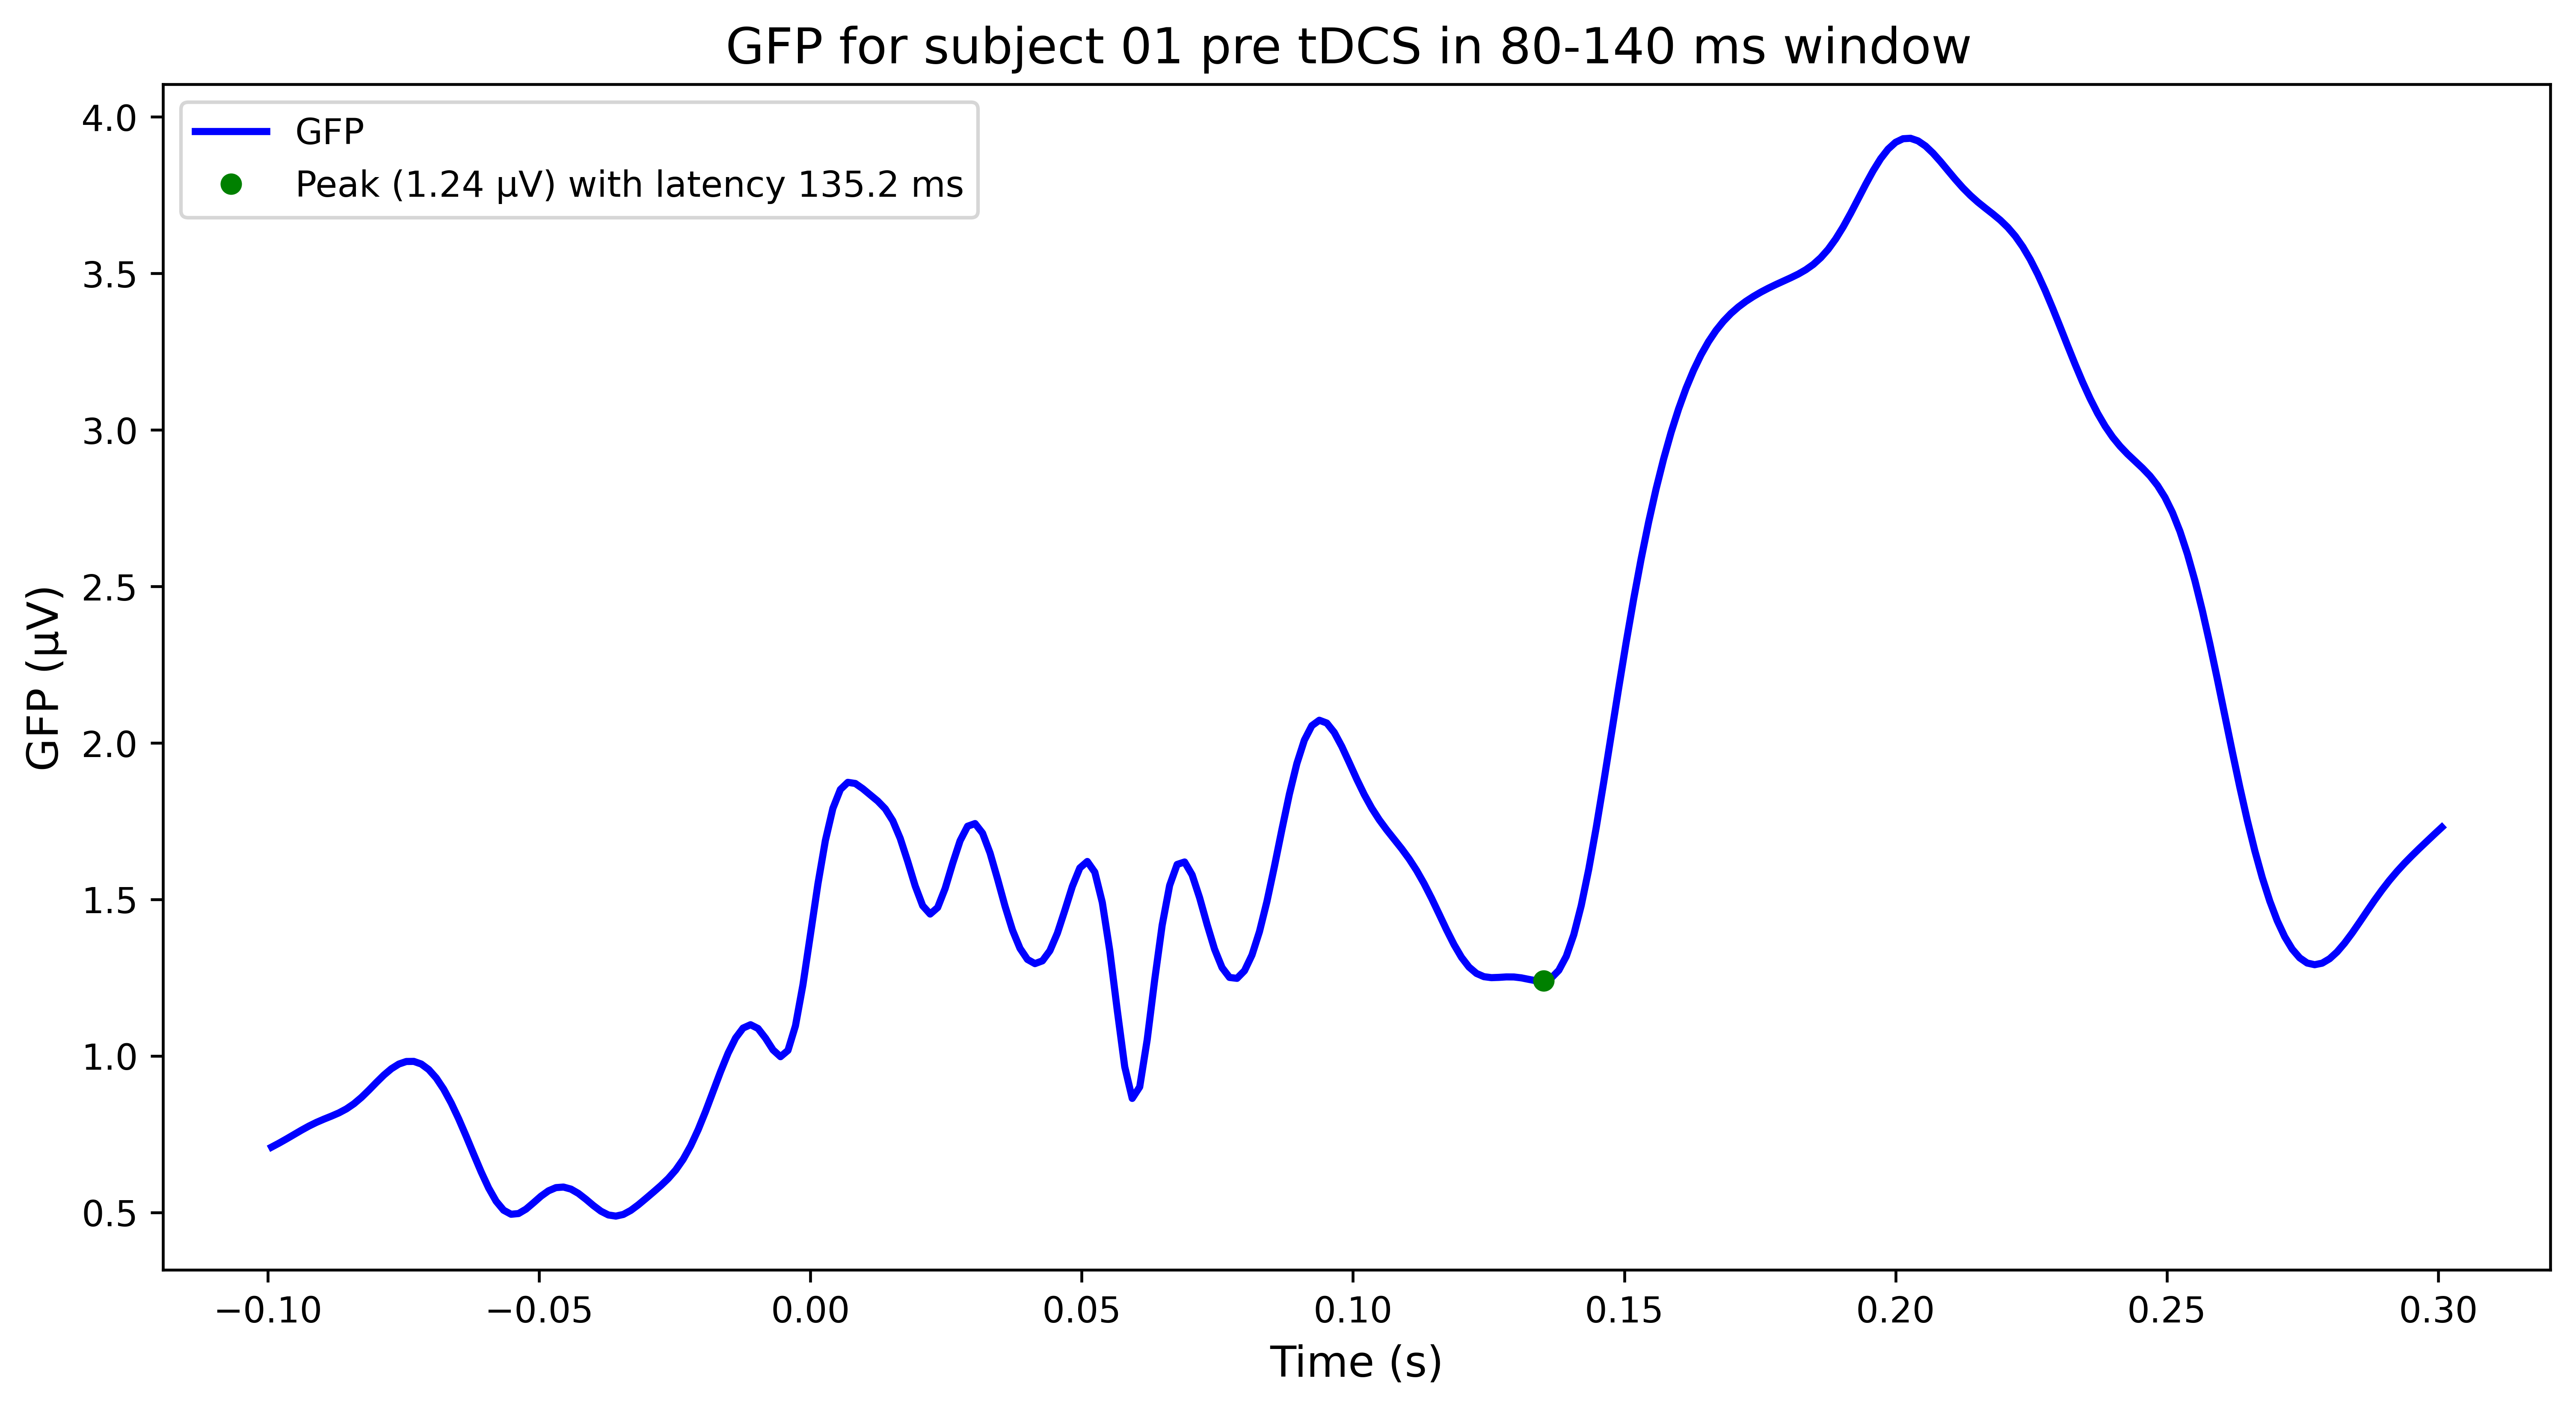

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(times_pre, gfp_pre, 'b-', label='GFP', linewidth=2)
plt.plot(min_peak_time_pre, min_peak_value_pre, 'go',
         label=f"Peak ({min_peak_value_pre.round(2)} µV) with latency {min_peak_time_pre.round(4)*1000} ms",
         markersize=5)
plt.title(f"GFP for subject {subject} pre tDCS in 80-140 ms window ", fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('GFP (µV)', fontsize=12)
plt.legend()

plt.show()


In [12]:
plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_pre_tdcs_peak.png", dpi=600)
plt.close(fig)

<Figure size 7200x4800 with 0 Axes>

### Plotting post

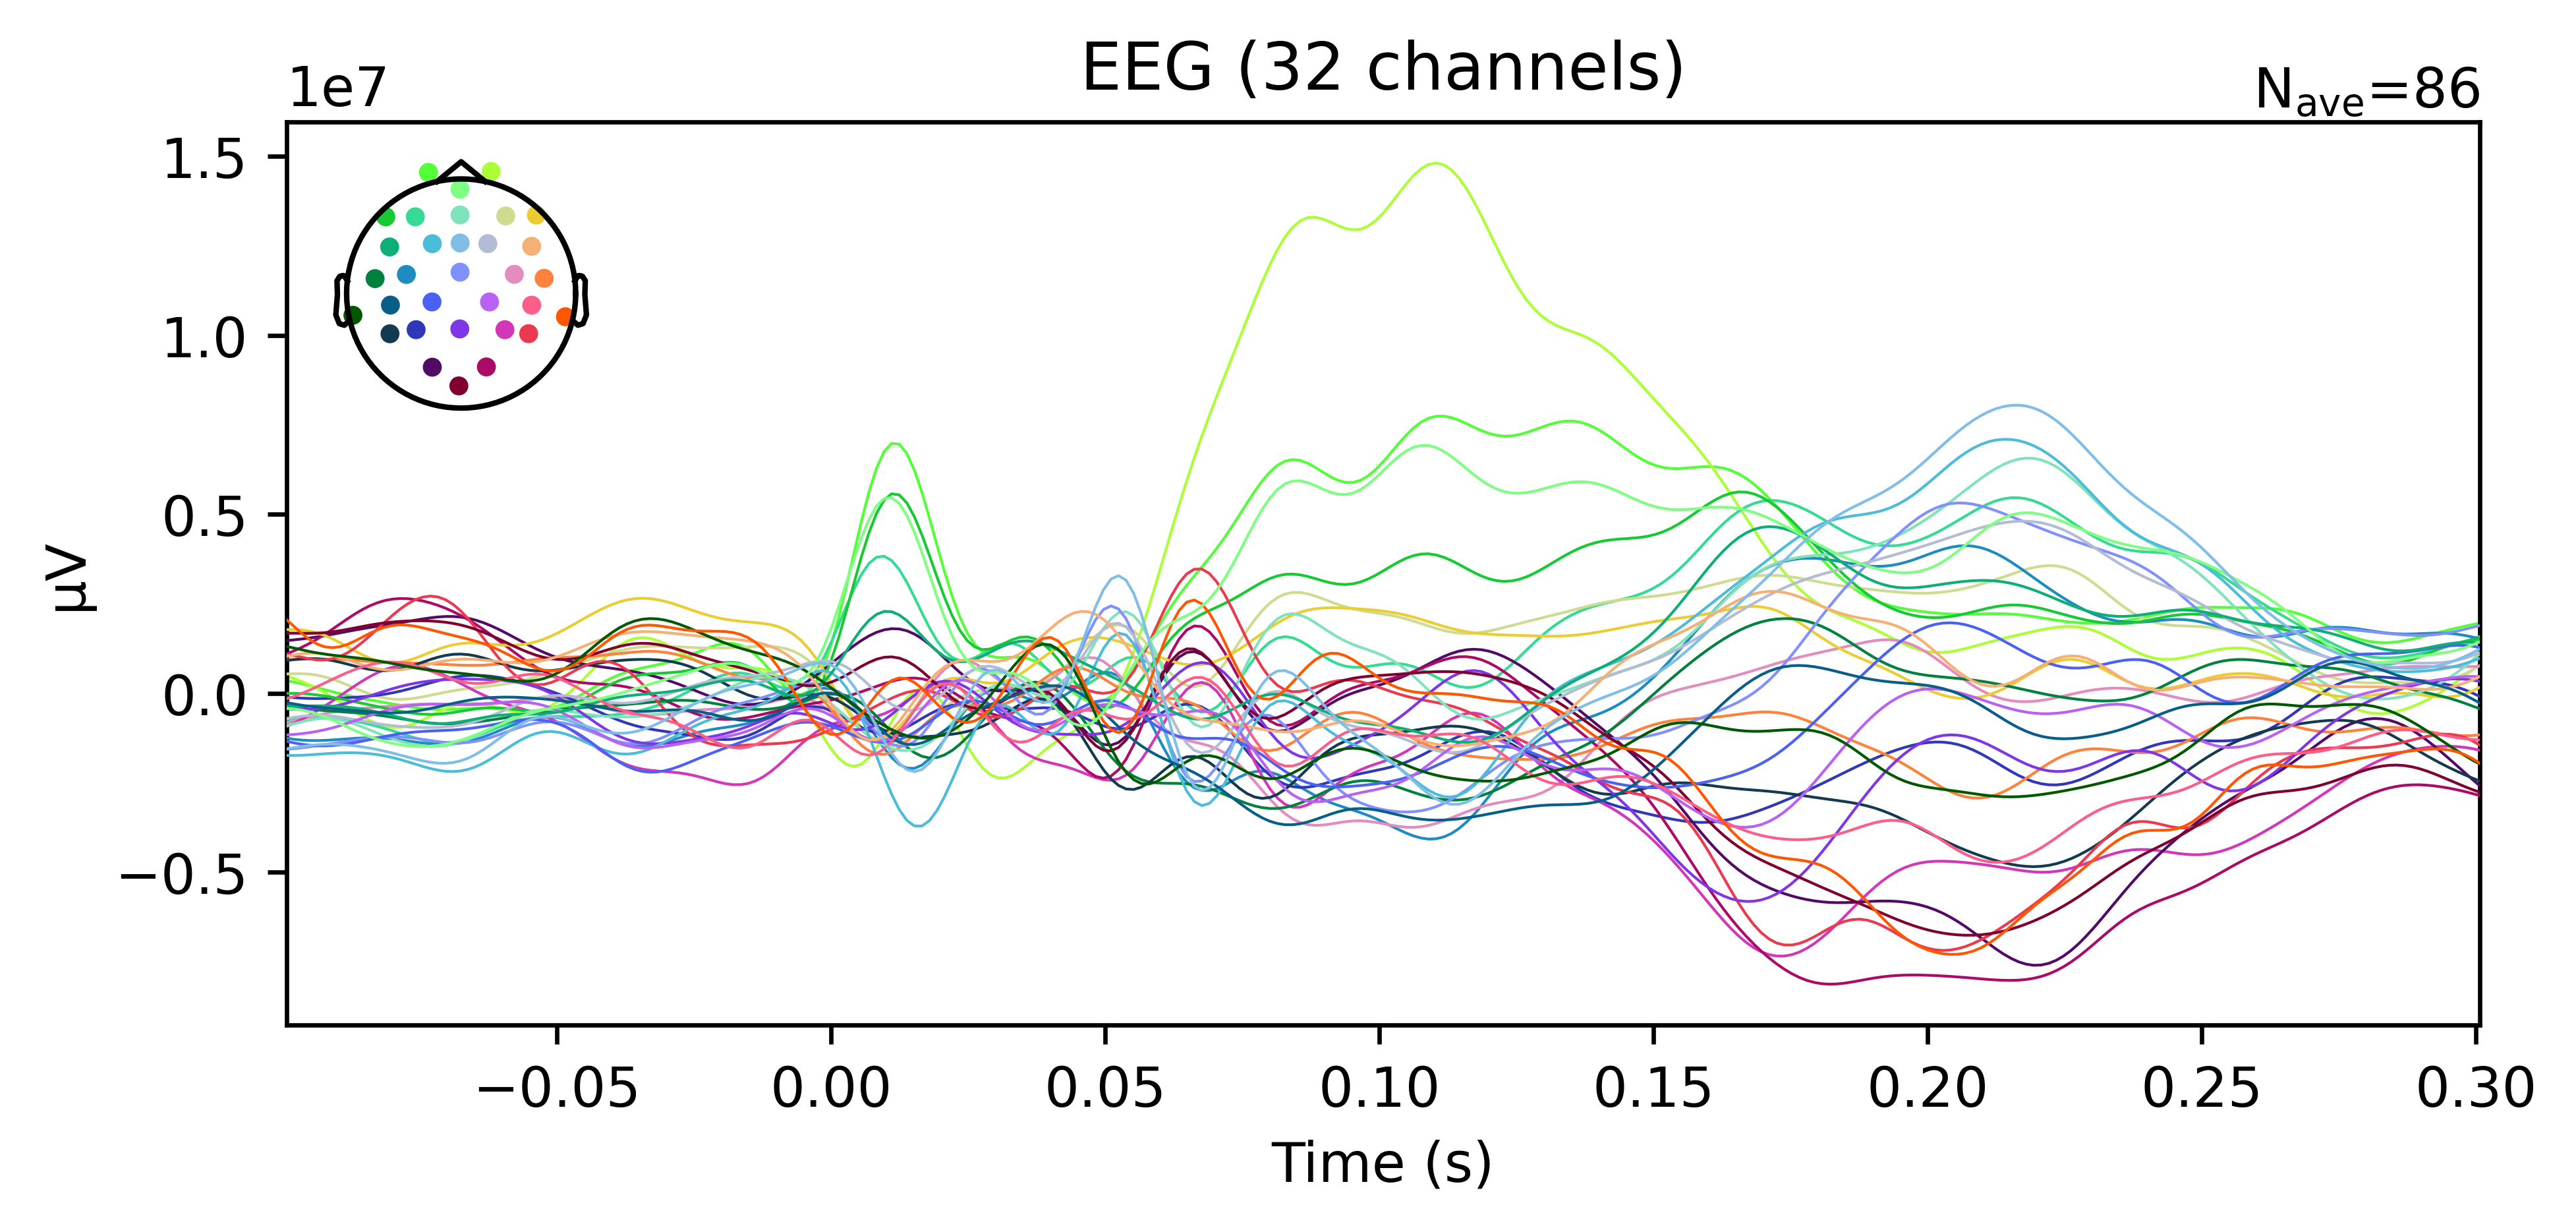

In [13]:
## evoked plot post
fig = evoked_post.plot(unit=True, show=True, ylim=None, proj=False, hline=None, scalings=None, titles=None, axes=None, gfp=False, window_title=f"subject_{subject}_post_evoked",
selectable=False, time_unit='s',  verbose=True);

In [14]:
fig.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_post_tdcs_evoked.png", dpi=600)
plt.close(fig)

## Plotting post

In [15]:
# GFP plot pre
## get data from evoked object channels x times
D_post = evoked_post.get_data()

## get times for x-axis
times_post = evoked_post.times
## calculate gfp as standard deviations over all channels for each point in time

gfp_post = D_post.std(axis=0, ddof=0)

## invert for negative peaks
inverted_gfp_post = -gfp_post


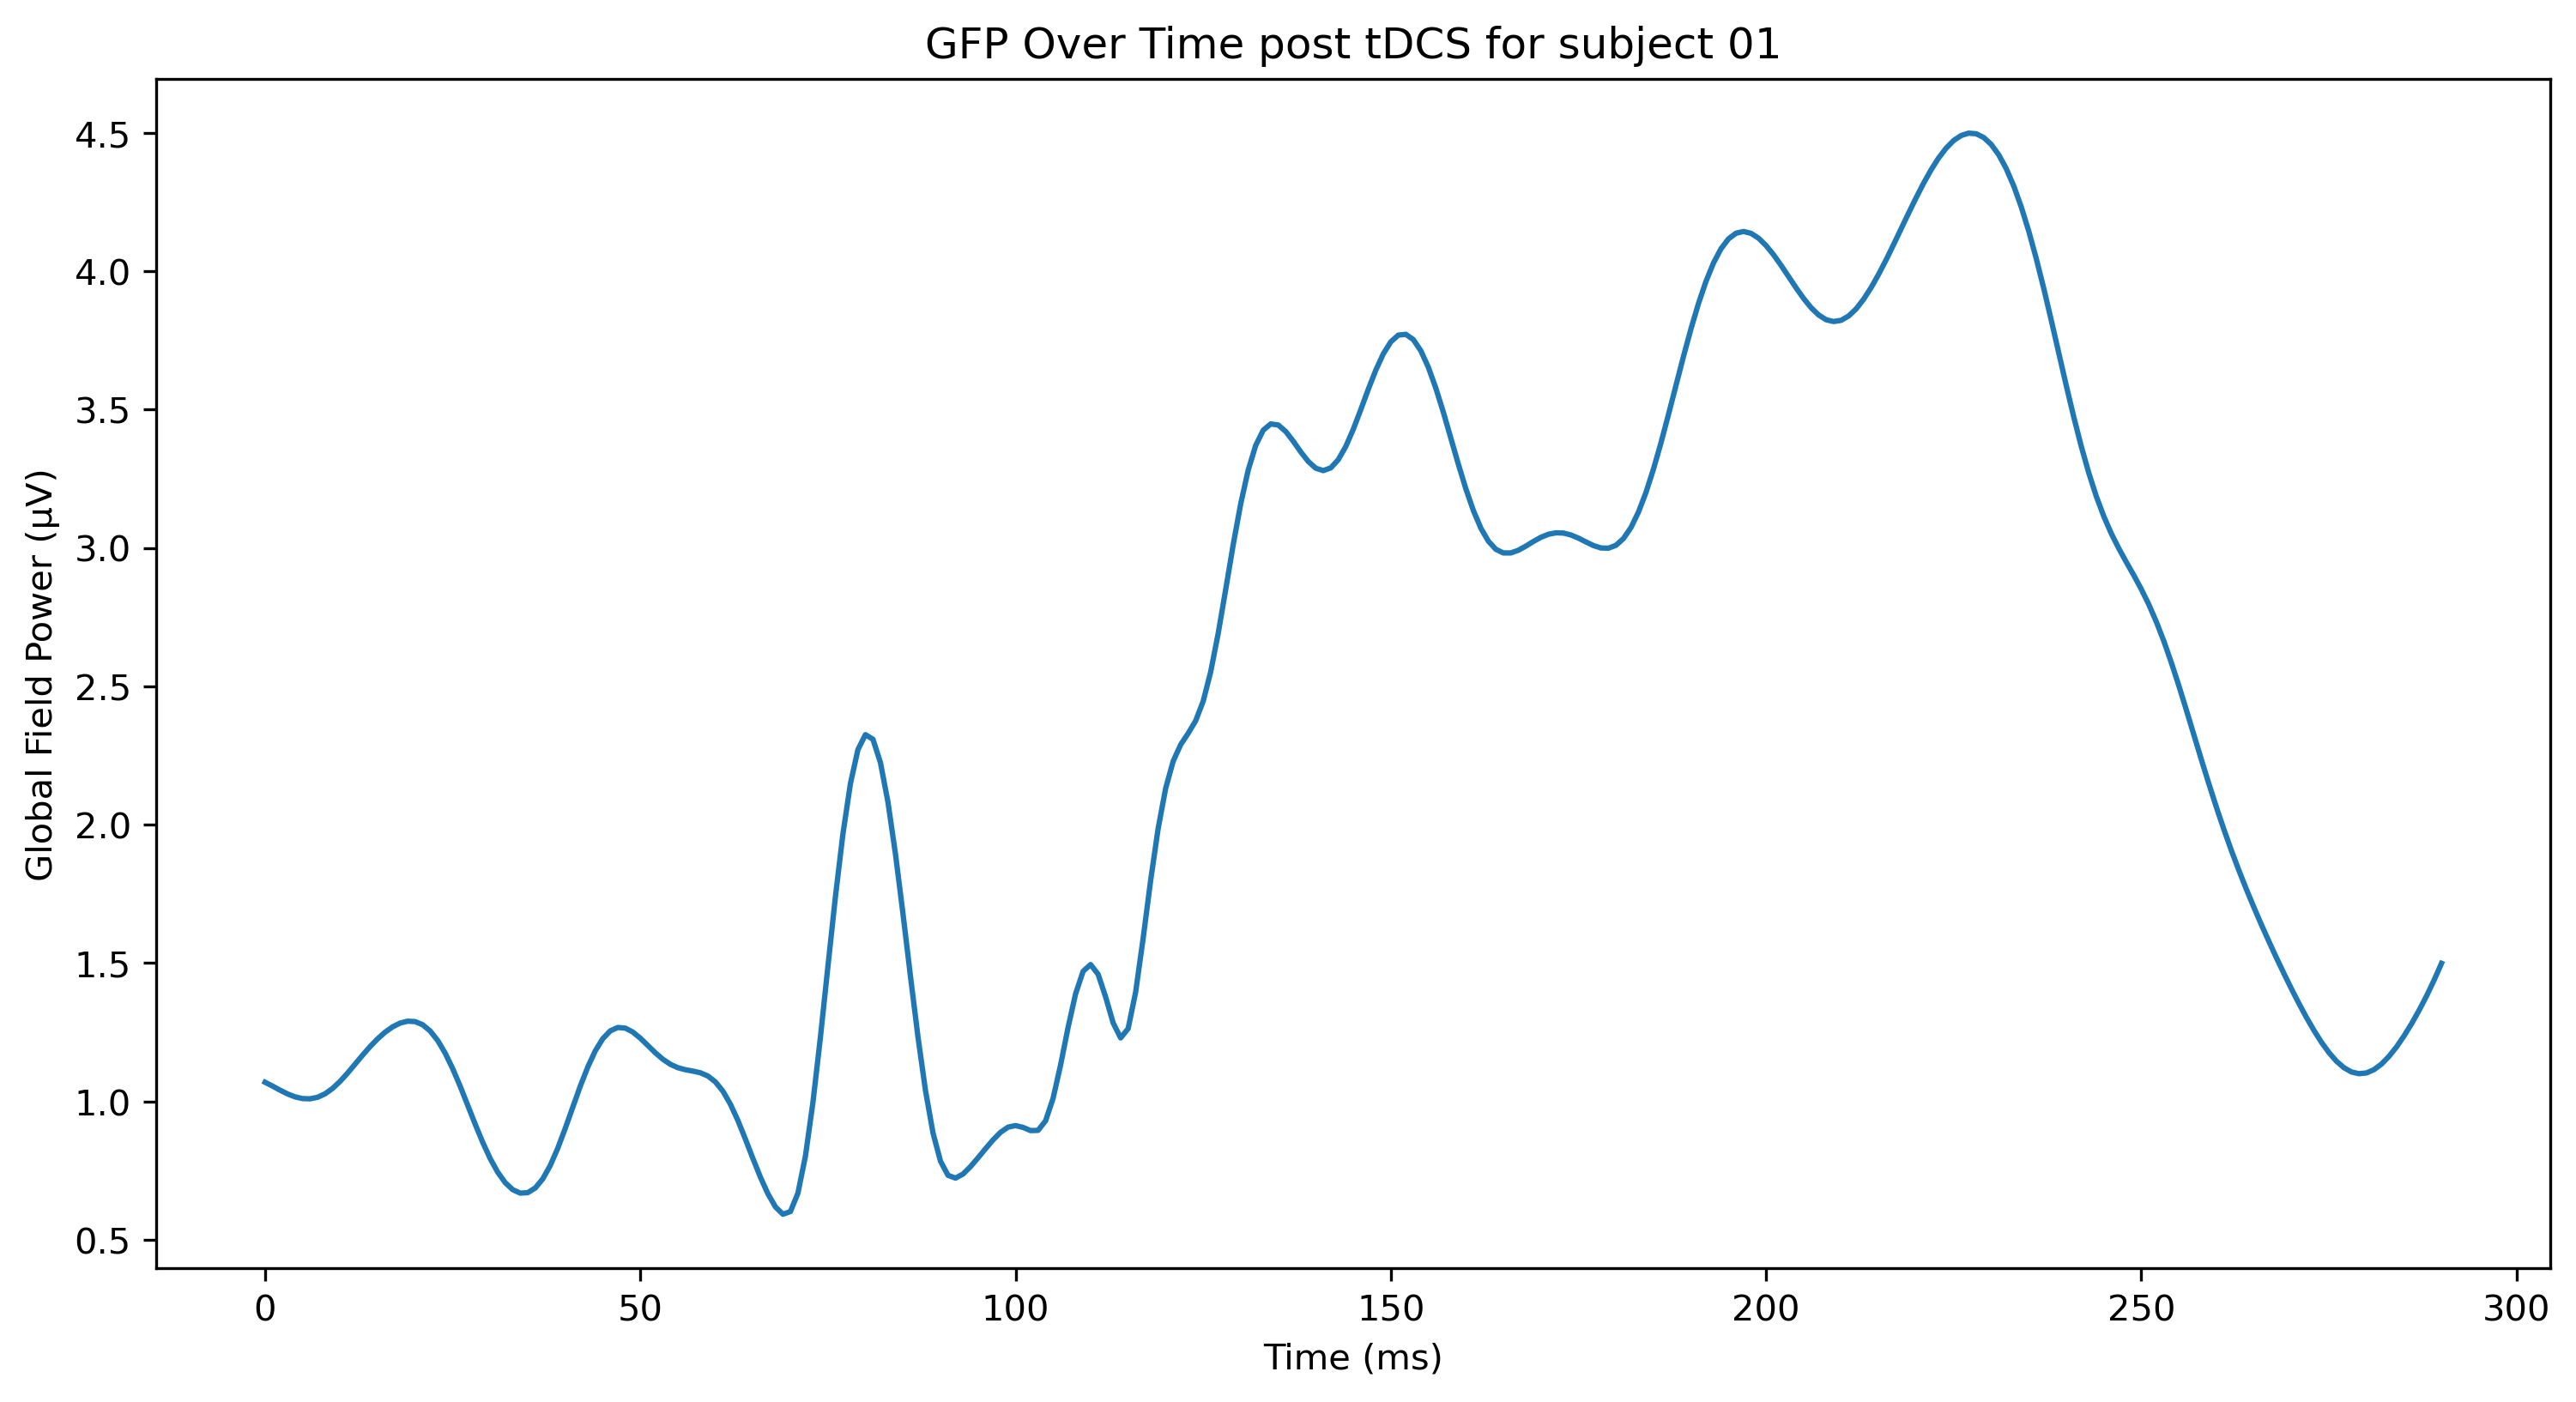

In [16]:
# Create the plot
plt.figure(figsize=(12, 6), dpi=300)  # Set figure size and high DPI for quality
plt.plot(gfp_post)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Global Field Power (µV)')
plt.title(f"GFP Over Time post tDCS for subject {subject}")
plt.show()

In [17]:
# Save the figure in high resolution
plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_post_tdcs_gfp.png", dpi=600, bbox_inches='tight')
plt.close(fig)

<Figure size 7200x4800 with 0 Axes>

## Plotting post

In [18]:
from scipy.signal import find_peaks

time_mask_post = (times_post >= 0.08) & (times_post <= 0.140)  # Adjust time range as needed
time_window_peaks_post, _ = find_peaks(-gfp_post[time_mask_post],
                                 prominence=0.01,
                                distance=20)

# Convert peak indices to actual times
peak_times_post = times_post[time_mask_post][time_window_peaks_post]
peak_values_post = gfp_post[time_mask_post][time_window_peaks_post]

min_peak_index_post = np.argmin(peak_values_post)

# Use this index to get the corresponding time
min_peak_time_post = peak_times_post[min_peak_index_post]
min_peak_value_post = peak_values_post[min_peak_index_post]

In [19]:
print(f"min_peak_time_post", min_peak_time_post)
print(f"min_peak_value_post", min_peak_value_post)

min_peak_time_post 0.12827586206896552
min_peak_value_post 2.9820651819014894


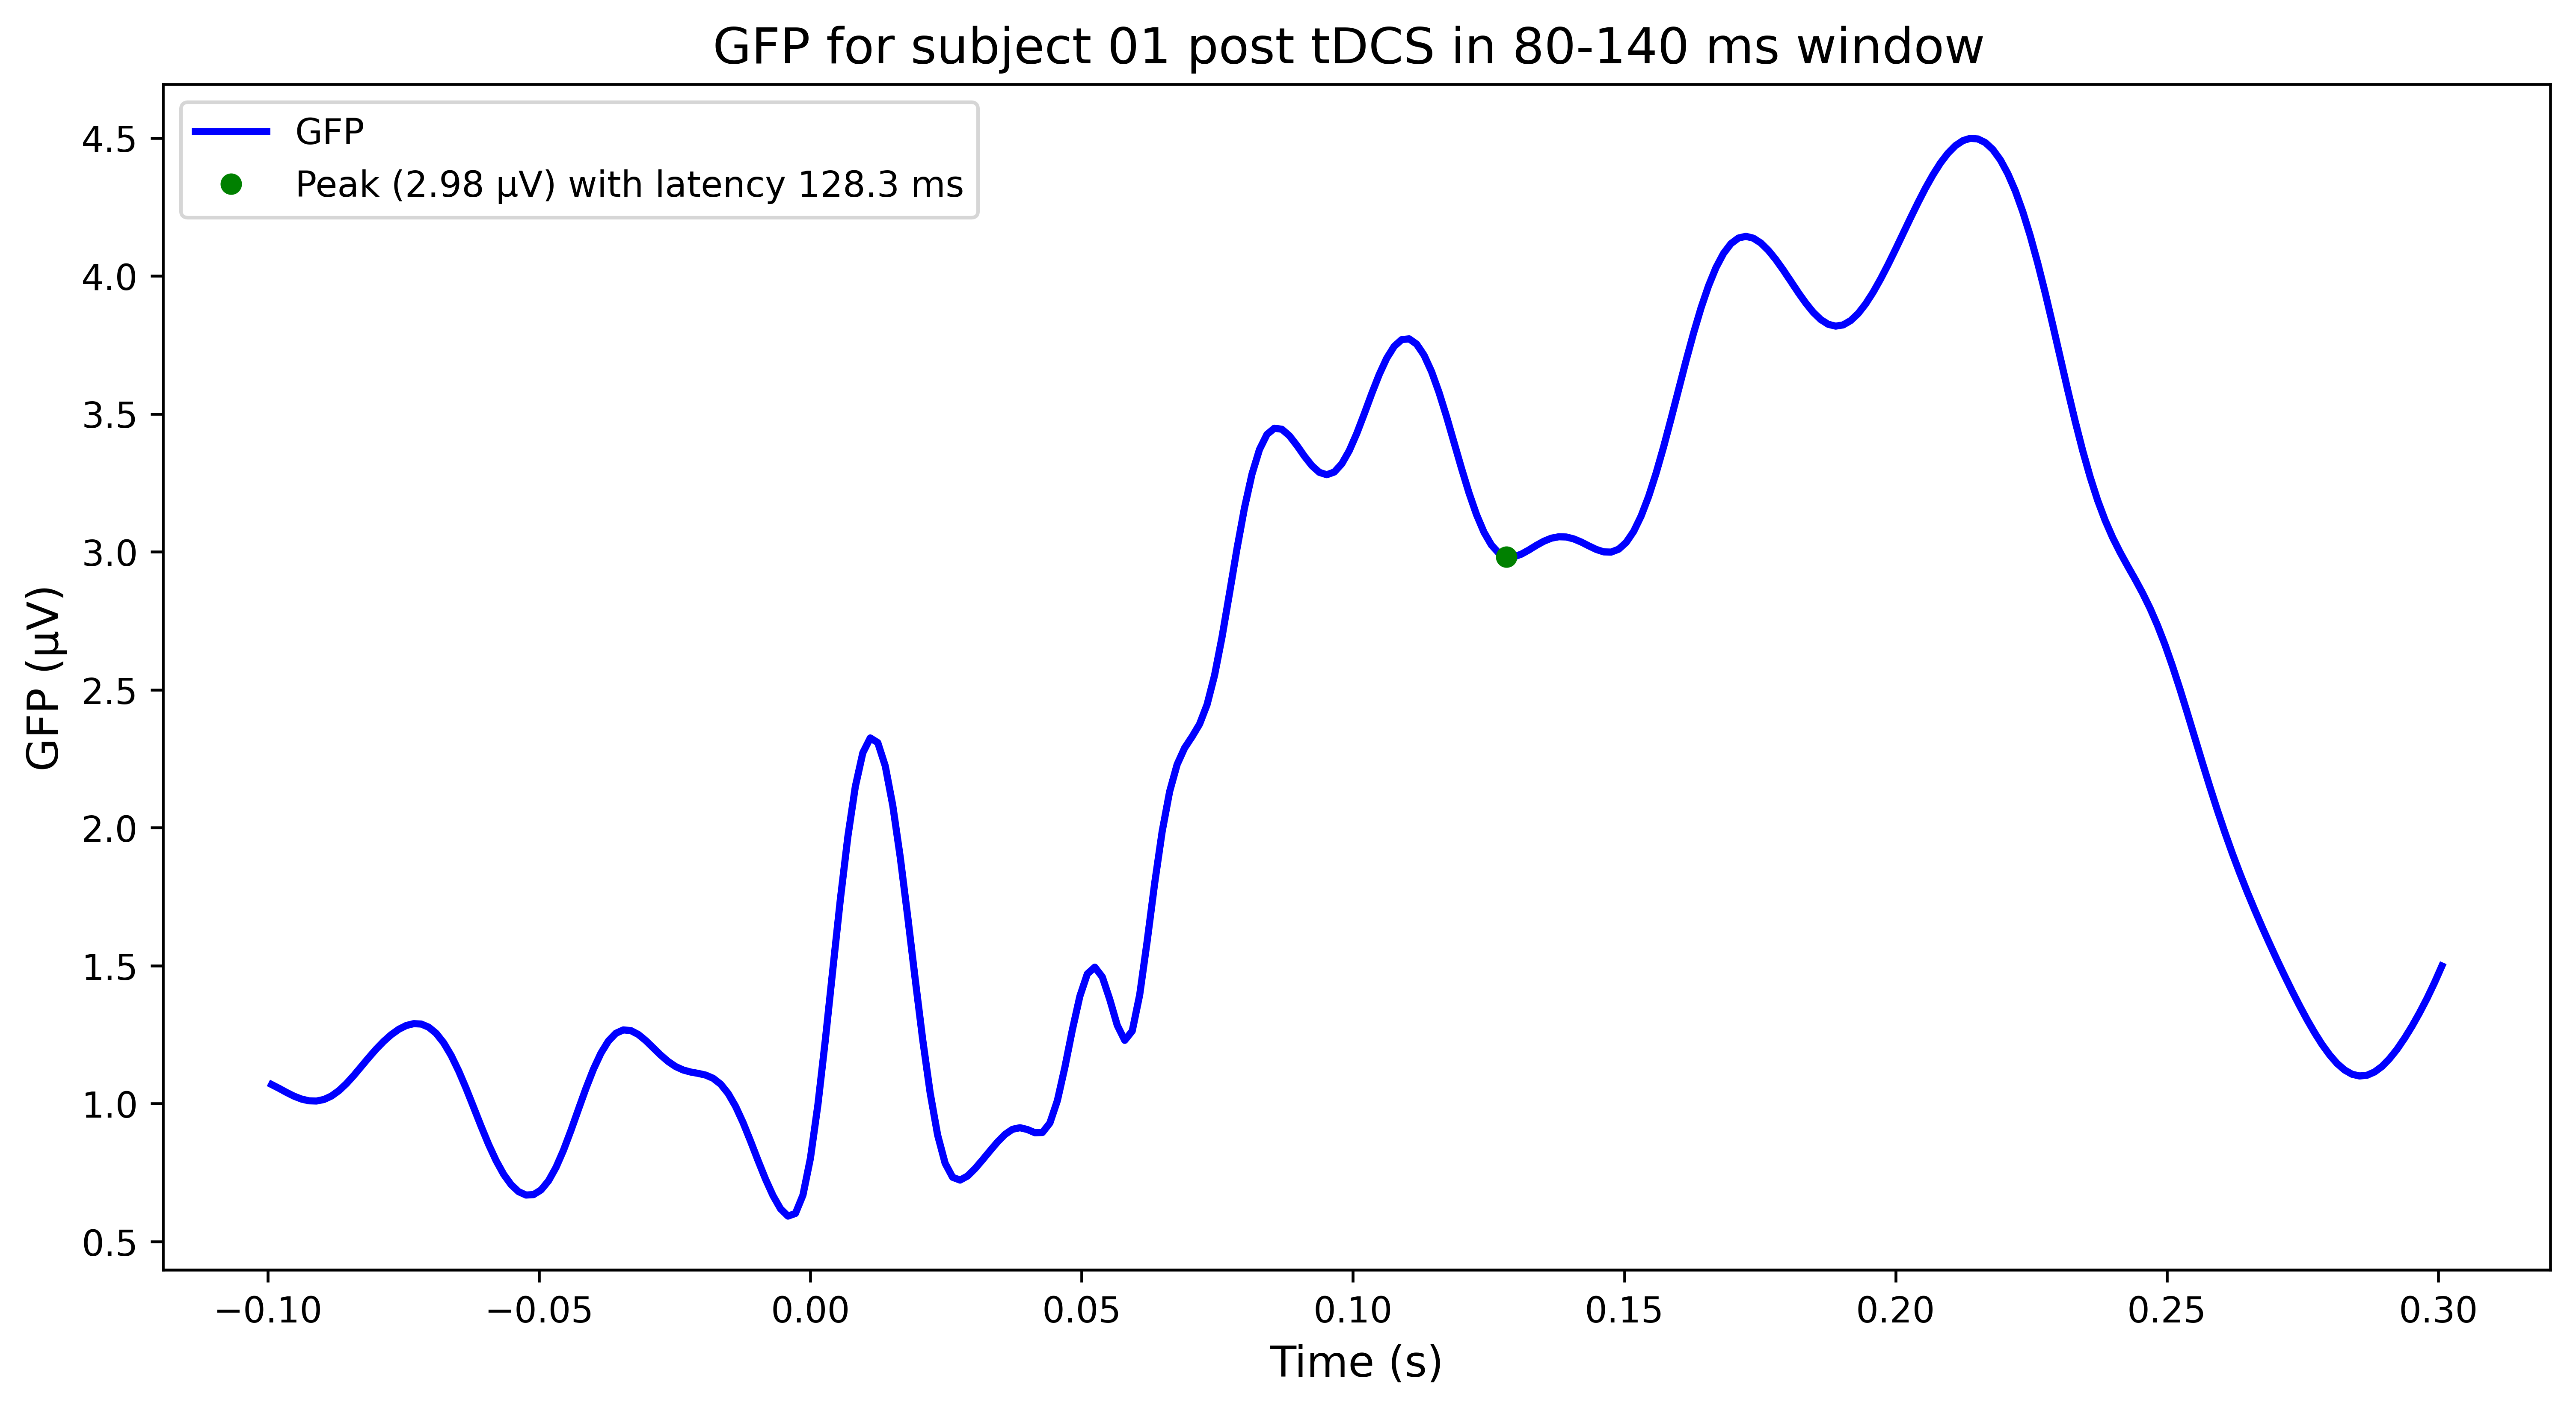

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(times_post, gfp_post, 'b-', label='GFP', linewidth=2)
plt.plot(min_peak_time_post, min_peak_value_post, 'go',
         label=f"Peak ({min_peak_value_post.round(2)} µV) with latency {min_peak_time_post.round(4)*1000} ms",
         markersize=5)
plt.title(f"GFP for subject {subject} post tDCS in 80-140 ms window ", fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('GFP (µV)', fontsize=12)
plt.legend()
plt.show()

In [21]:
plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_post_tdcs_peak.png", dpi=600)
plt.close(fig)

<Figure size 7200x4800 with 0 Axes>

## Compare

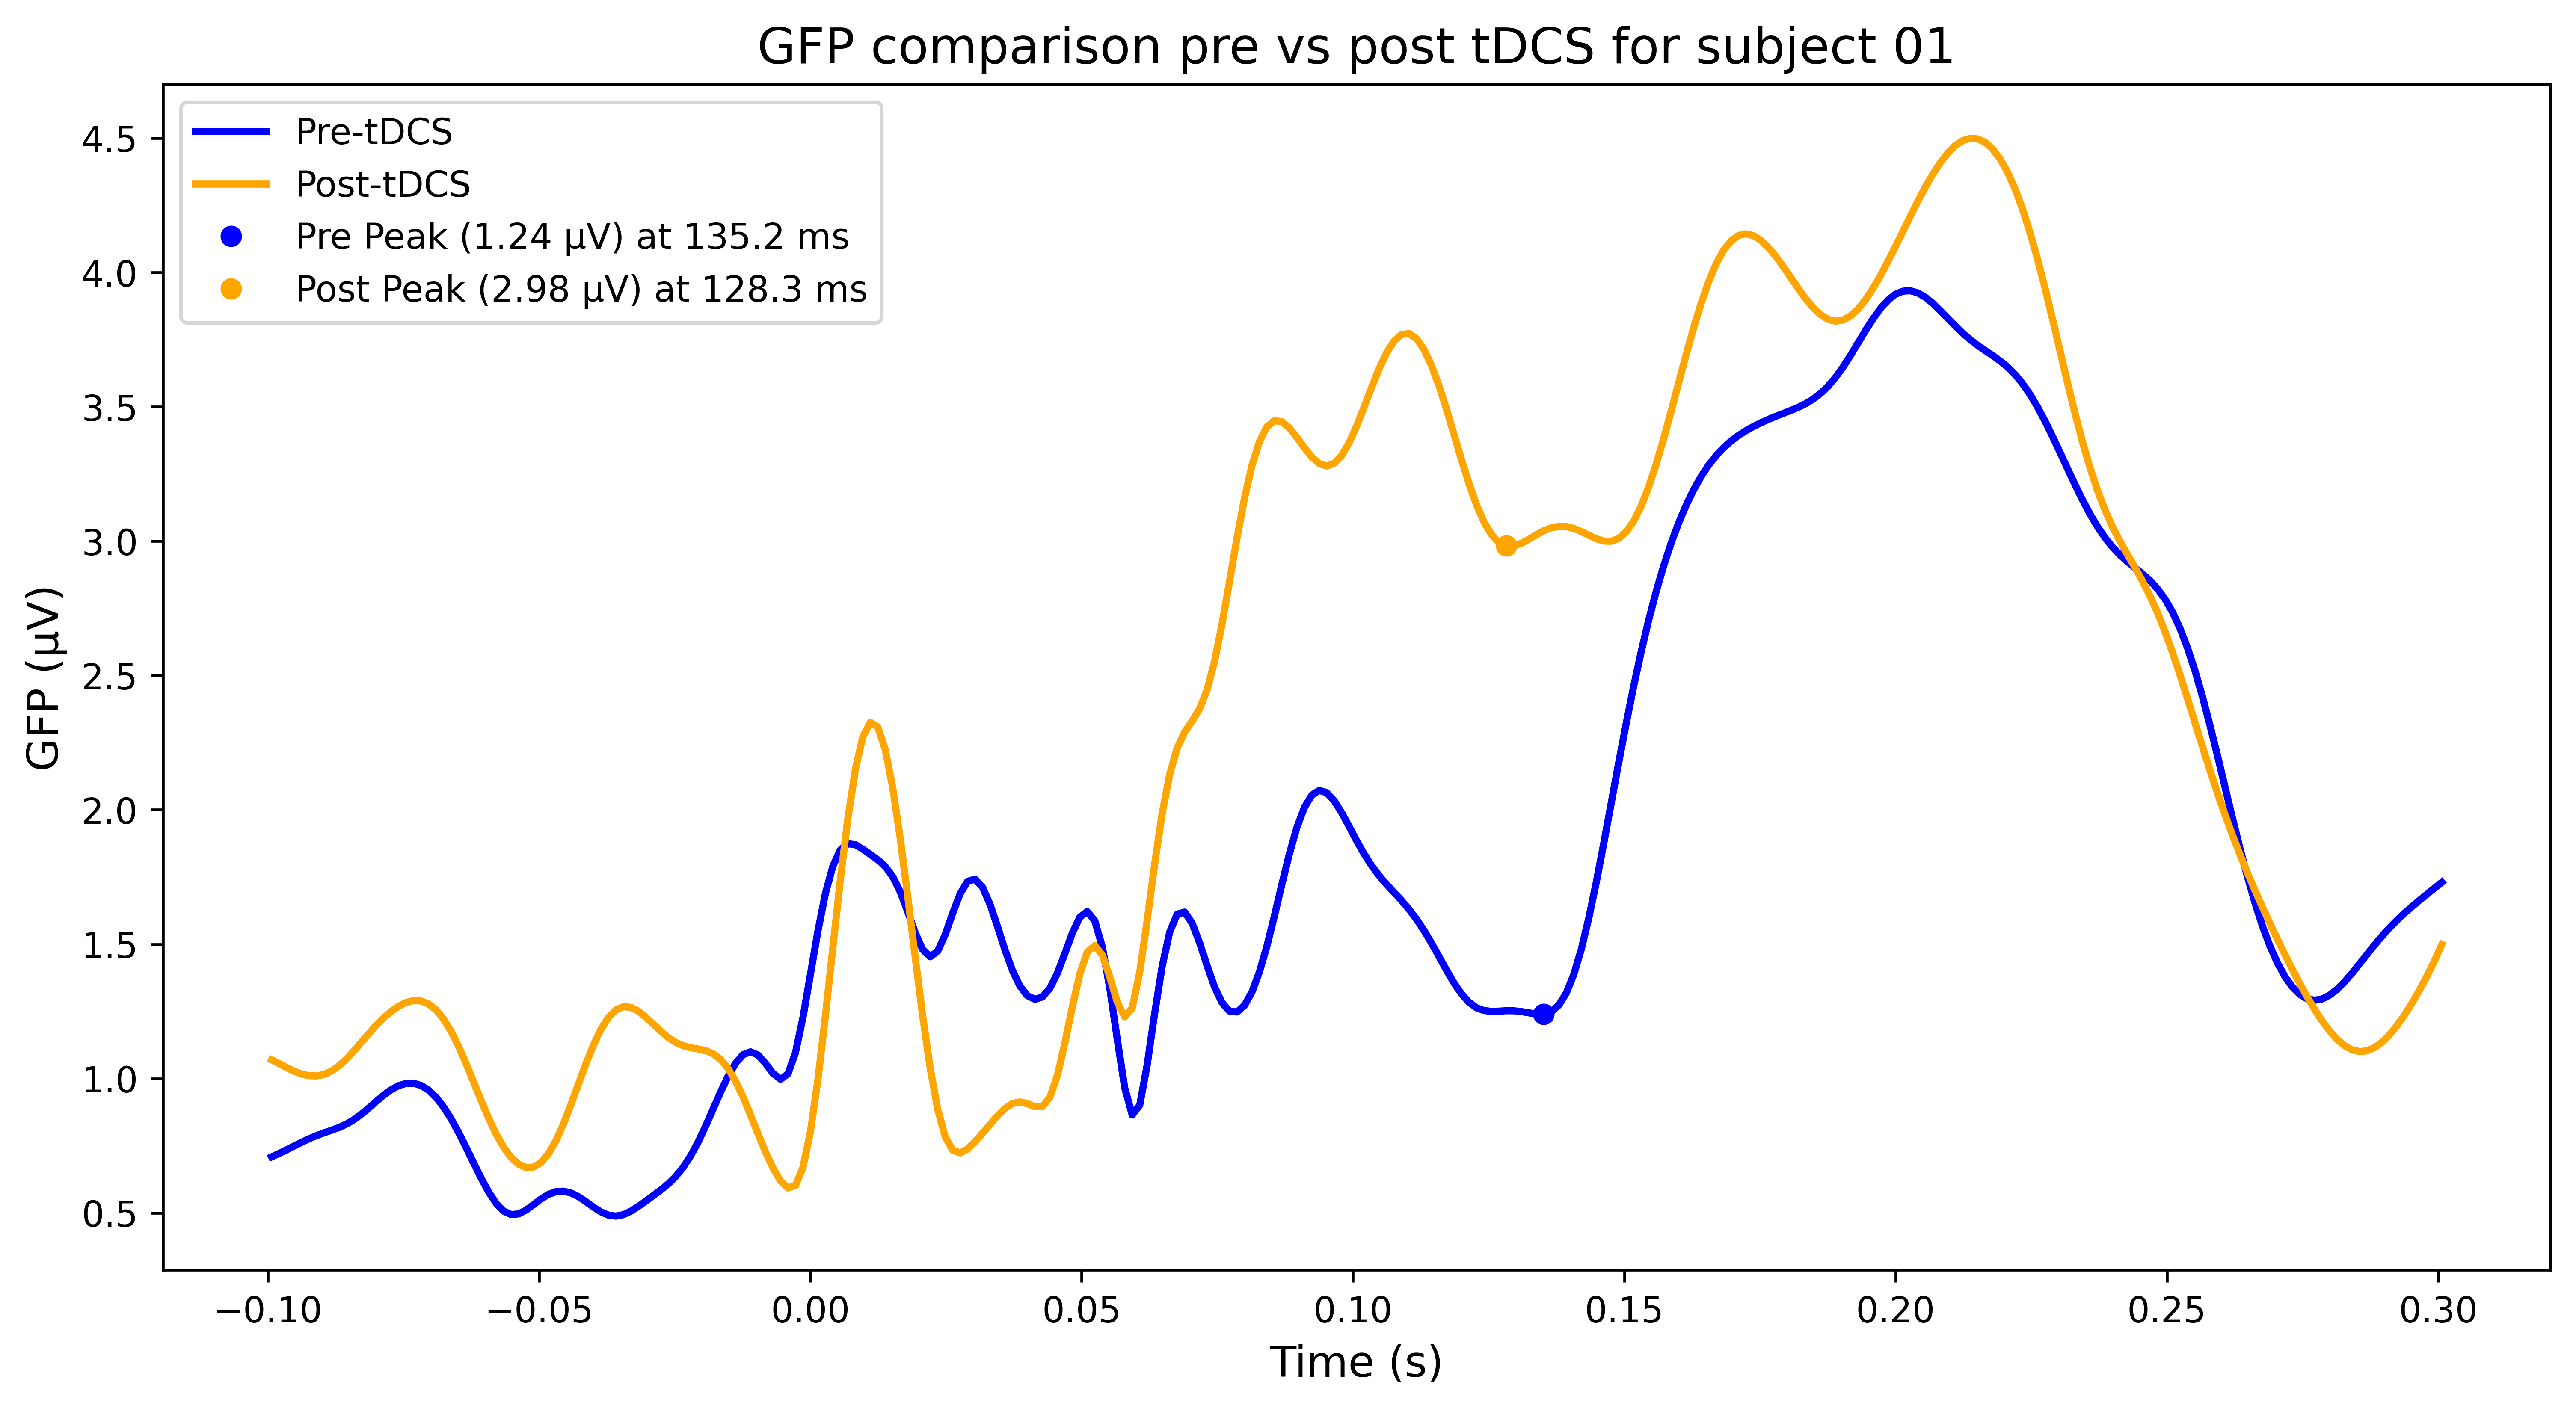

In [22]:
# Create a single figure for both pre and post GFP
plt.figure(figsize=(12, 6))

# Plot pre-tDCS GFP in blue
plt.plot(times_pre, gfp_pre, 'b-', label='Pre-tDCS', linewidth=2)

# Plot post-tDCS GFP in orange
plt.plot(times_pre, gfp_post, 'orange', label='Post-tDCS', linewidth=2)

# Add peaks if desired
plt.plot(min_peak_time_pre, min_peak_value_pre, 'bo',
         label=f"Pre Peak ({min_peak_value_pre.round(2)} µV) at {min_peak_time_pre.round(4)*1000} ms",
         markersize=5)
plt.plot(min_peak_time_post, min_peak_value_post, 'o', color='orange',
         label=f"Post Peak ({min_peak_value_post.round(2)} µV) at {min_peak_time_post.round(4)*1000} ms",
         markersize=5)

# Add labels and title
plt.title(f"GFP comparison pre vs post tDCS for subject {subject}", fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('GFP (µV)', fontsize=12)
plt.legend()

# Save and show the plot
plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_pre_post_tdcs_gfp_comparison.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close()


In [29]:
n100_pre = evoked_pre.get_peak(tmin=0.080, tmax=0.140, mode='neg', time_as_index=False, return_amplitude=True)
n100_post = evoked_post.get_peak(tmin=0.080, tmax=0.140, mode='neg', time_as_index=False, return_amplitude=True)

print(f"N100_pre = {n100_pre}")
print(f"N100_post = {n100_post}")

channel_pre, latency_pre, amplitude_pre = n100_pre
channel_post, latency_post, amplitude_post = n100_post

TypeError: Evoked.get_peak() got an unexpected keyword argument 'include'

In [24]:
# Print in an easy-to-read format
print("N100 Peak Comparison:")
print(f"\nPre condition:")
print(f"Channel: {channel_pre}")
print(f"Latency: {latency_pre:.3f} seconds")
print(f"Amplitude: {amplitude_pre:} microVolts")

print(f"\nPost condition:")
print(f"Channel: {channel_post}")
print(f"Latency: {latency_post:.3f} seconds")
print(f"Amplitude: {amplitude_post} microVolts")

# Calculate difference
amplitude_difference = amplitude_post - amplitude_pre
print(f"\nAmplitude difference (Post - Pre): {amplitude_difference:} microVolts")

N100 Peak Comparison:

Pre condition:
Channel: C4
Latency: 0.092 seconds
Amplitude: -3.25063313015562 microVolts

Post condition:
Channel: C3
Latency: 0.109 seconds
Amplitude: -4.072452625607903 microVolts

Amplitude difference (Post - Pre): -0.8218194954522833 microVolts


In [25]:
min_peak_time_pre

np.float64(0.13517241379310344)

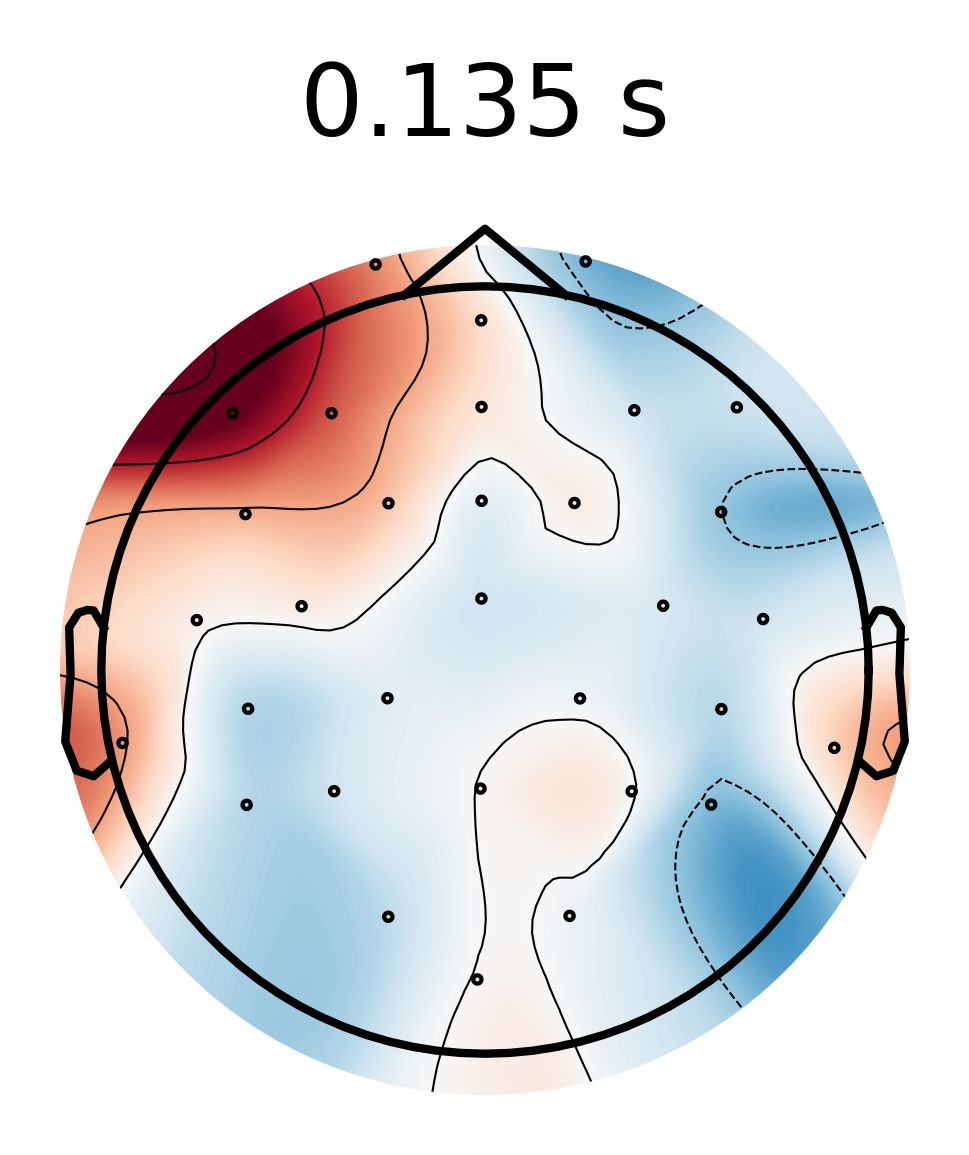

In [26]:
evoked_pre.plot_topomap(times=min_peak_time_pre, average=None, size=1, colorbar=False);

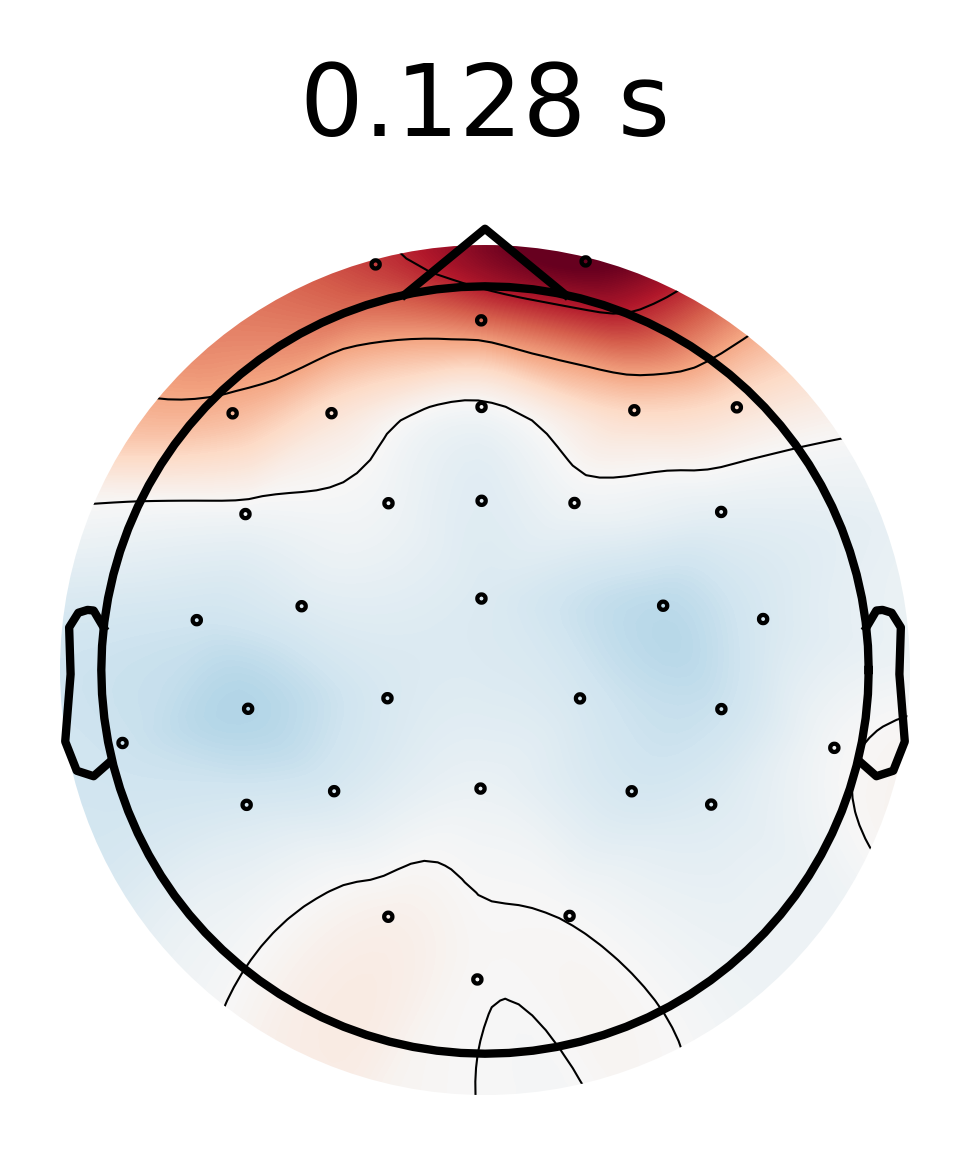

In [27]:
evoked_post.plot_topomap(times=min_peak_time_post, average=None, size=1, colorbar=False);

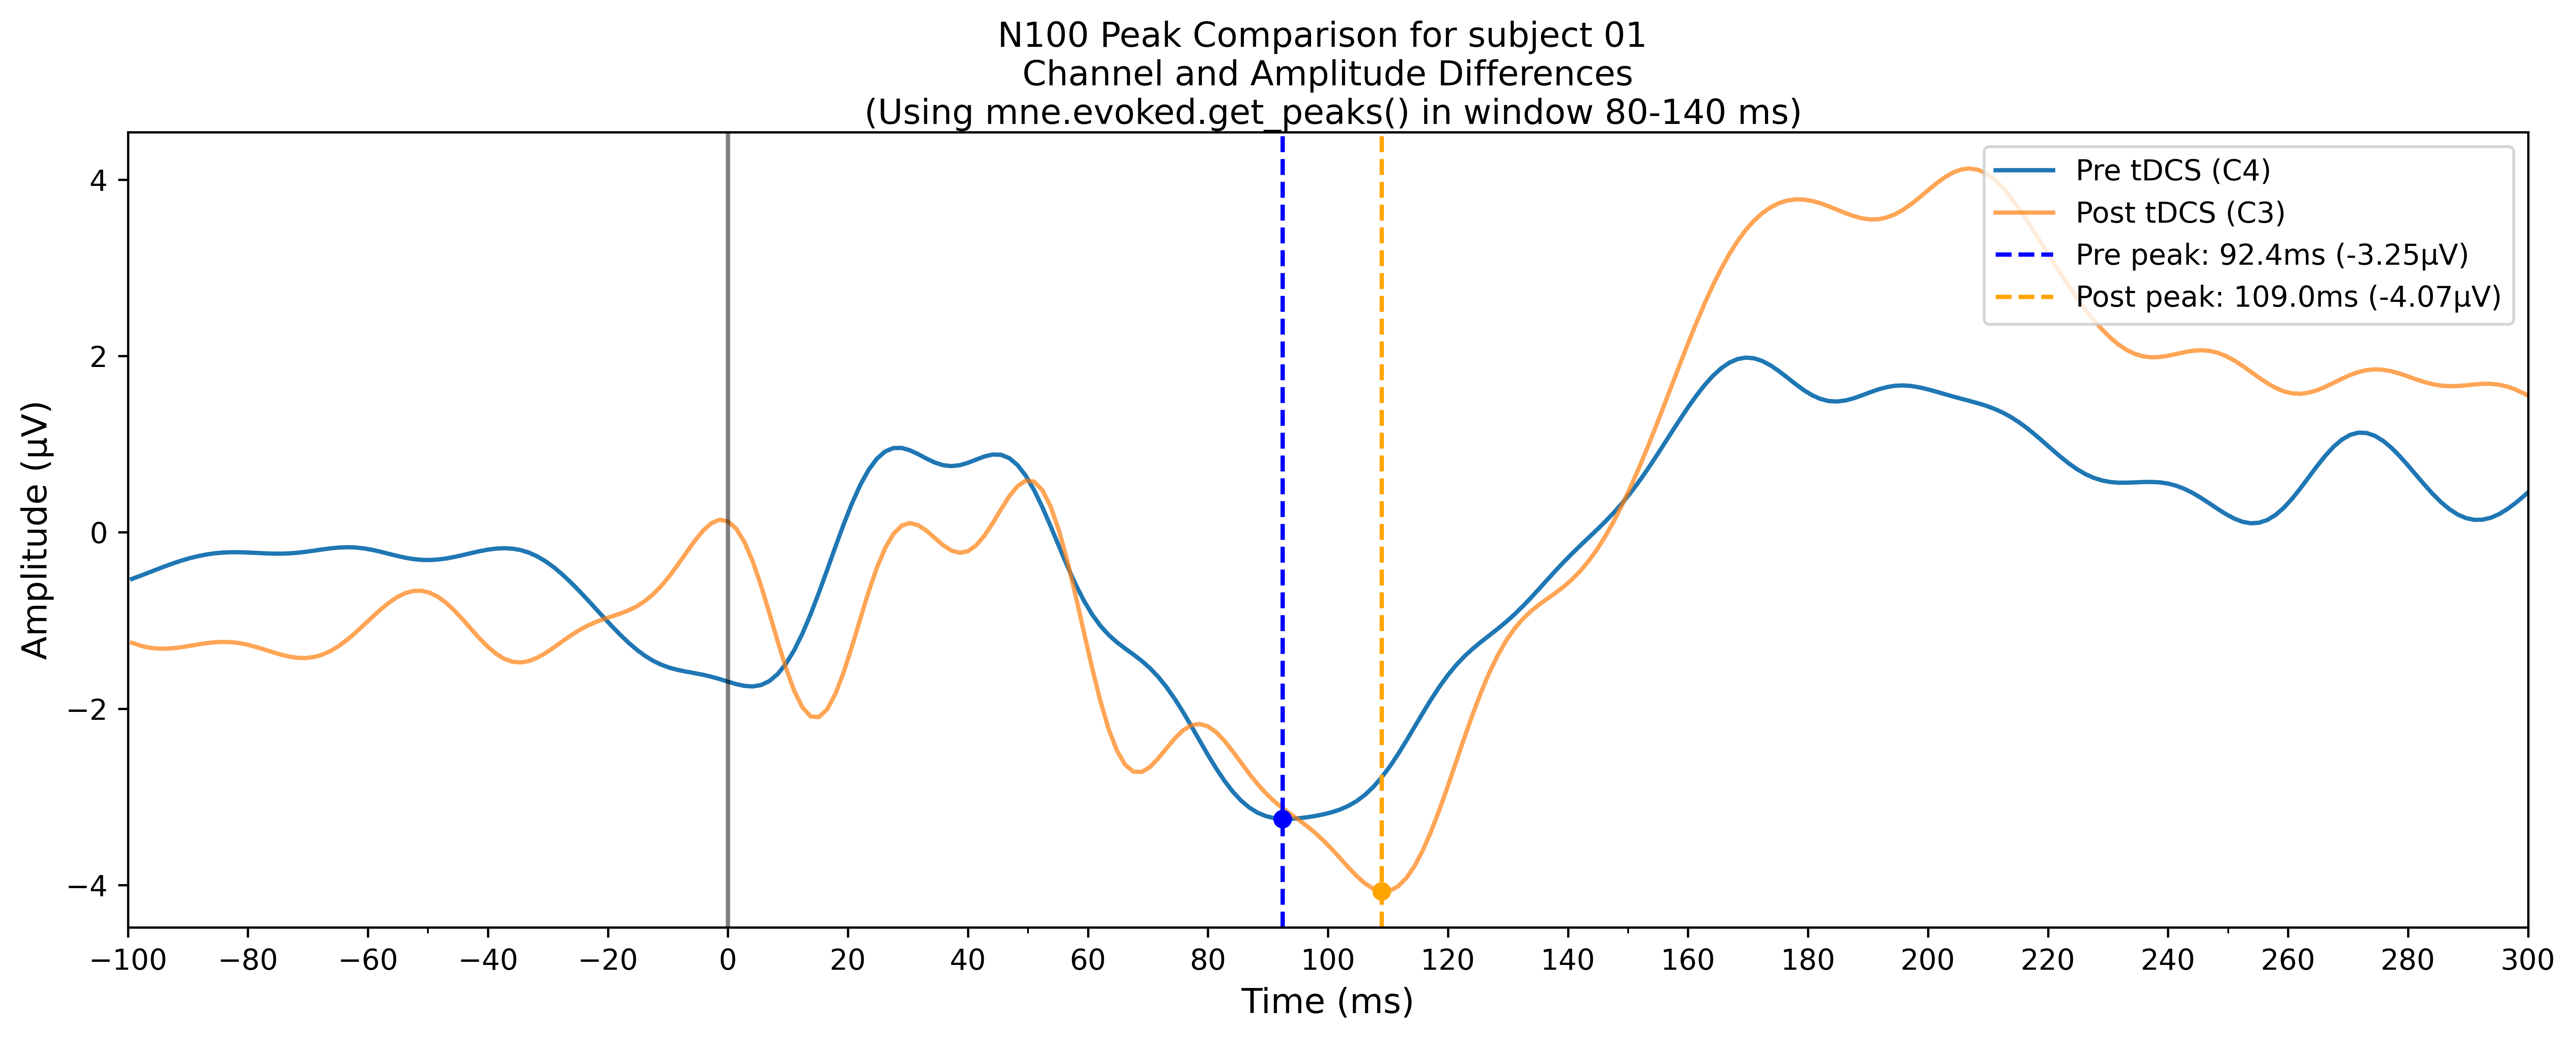

In [28]:
# Create figure and axis
plt.figure(figsize=(15, 5))

# Convert times to milliseconds
times_ms = evoked_pre.times * 1000  # Convert to milliseconds

# Plot both responses with channel names in labels
pre_line, = plt.plot(times_ms, evoked_pre.get_data(picks=n100_pre[0])[0],
                     label=f'Pre tDCS ({n100_pre[0]})')
post_line, = plt.plot(times_ms, evoked_post.get_data(picks=n100_post[0])[0],
                      label=f'Post tDCS ({n100_post[0]})', alpha=0.7)

# Create vertical line labels with all peak info (convert to ms)
pre_vline = plt.axvline(n100_pre[1]*1000, color='blue', linestyle='--',
                       label=f'Pre peak: {n100_pre[1]*1000:.1f}ms ({n100_pre[2]:.2f}µV)')
post_vline = plt.axvline(n100_post[1]*1000, color='orange', linestyle='--',
                        label=f'Post peak: {n100_post[1]*1000:.1f}ms ({n100_post[2]:.2f}µV)')

# Add vertical line at time 0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)

# Set x-axis limits and ticks
plt.xlim(-100, 300)  # Set limits in milliseconds
plt.xticks(np.arange(-100, 301, 20))  # Major ticks every 100ms
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(50))  # Minor ticks every 50ms

# Add peak markers (convert to ms)
plt.scatter(n100_pre[1]*1000, n100_pre[2], color='blue', s=30, zorder=5)
plt.scatter(n100_post[1]*1000, n100_post[2], color='orange', s=30, zorder=5)

# Labels and legend
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Amplitude (µV)', fontsize=12)

legend_elements = [
    pre_line,
    post_line,
    plt.Line2D([0], [0], color='blue', linestyle='--', label=pre_vline.get_label()),
    plt.Line2D([0], [0], color='orange', linestyle='--', label=post_vline.get_label())
]

plt.legend(handles=legend_elements, loc='upper right', frameon=True)
plt.title(f"N100 Peak Comparison for subject {subject} \nChannel and Amplitude Differences\n (Using mne.evoked.get_peaks() in window 80-140 ms)", pad=2)

plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_peak_comparison_pre_post.png", dpi=600)
#plt.grid(True, which='major', linestyle='--', alpha=0.3)
plt.show()


In [ ]:
from mne.stats import permutation_cluster_1samp_test
diff = epochs_post.get_data() - epochs_pre.get_data()
t_obs, clusters, pvals, _ = permutation_cluster_1samp_test(
    diff, n_permutations=1000, adjacency=None, n_jobs=1)
